<h1 style="color: #47FF64;"> Import clean data .py file </h1>

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format) 

I did the code above to ensure that my data keeps formatted with 2 decimals as i wish

In [2]:
import os
print(os.getcwd())
os.chdir("C:/Users/Inês Bettencourt/Documents/Ironhack/Mid Project/mid project clean")
print(os.getcwd()) #redirect my directory to the new clean one

C:\Users\Inês Bettencourt\Documents\Ironhack\Mid Project
C:\Users\Inês Bettencourt\Documents\Ironhack\Mid Project\mid project clean


In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
df_clean = pd.read_csv("test_clean.csv")
df_clean.head()

,country,gdp,population_total,region,tourism_inbound,tourism_outbound,year
0,Algeria,"54,790,058,957.00",31719449,Africa,"102,000,000.00","193,000,000.00",2000
1,Angola,"9,129,594,819.00",13924930,Africa,"34,000,000.00","146,000,000.00",2000
2,Benin,"2,359,122,303.00",6949366,Africa,"77,000,000.00","50,000,000.00",2000
3,Botswana,"5,788,311,645.00",1755375,Africa,"227,000,000.00","209,000,000.00",2000
4,Burkina Faso,"2,610,959,139.00",11607944,Africa,"23,000,000.00","30,000,000.00",2000


<h1 style="color: #47FF64;"> 03| EDA (Exploratory Data Analysis) </h1>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<h3 style="color: #47FF64;"> Exploring numerical and categorical variable </h3>

In [6]:
categorical= df_clean.select_dtypes(exclude="number")

In [7]:
numerical= df_clean.select_dtypes(include="number")

<h3 style="color: #47FF64;"> Univariate analysis </h3>

I will start by doing univarite analyses for better understanding of each column

#### Categorical variables

The proportion table for country comes as 0.00 due to the number of unique values present in this column. Since thare are a lot of unique values the proportion is a very small number therefore gets rounded to 0.00. So it does not give much insights,that is why i did not calculate it in this notebook

However since the region column has a few unique values the proportion is well rounded and gives us real insights

In [8]:
frequency_table_region= df_clean.region.value_counts()
frequency_table_region.reset_index()

,region,count
0,Africa,689
1,Europe,624
2,The Americas,585
3,Asia,442
4,Oceania,195
5,Middle East,169


In [9]:
proportion_table_region = df_clean.region.value_counts(normalize=True).round(2)
proportion_table_region.reset_index()

,region,proportion
0,Africa,0.25
1,Europe,0.23
2,The Americas,0.22
3,Asia,0.16
4,Oceania,0.07
5,Middle East,0.06


In [10]:
region_table= pd.concat([frequency_table_region,proportion_table_region], axis=1)
region_table.columns= ['absolute_frequency', 'relative_frequency']
region_table

,absolute_frequency,relative_frequency
region,,
Africa,689,0.25
Europe,624,0.23
The Americas,585,0.22
Asia,442,0.16
Oceania,195,0.07
Middle East,169,0.06


The frequency table gives the count of region, while the proportion table provides the percentage representation of each reagion in the dataset. This helps to quickly identify dominant and minority categories. I can already conclude that Africa is the major region followed by Europe and the region with the less proportion in this df is Middle East as it will also be shown in the visualizations bellow

#### Visualizations

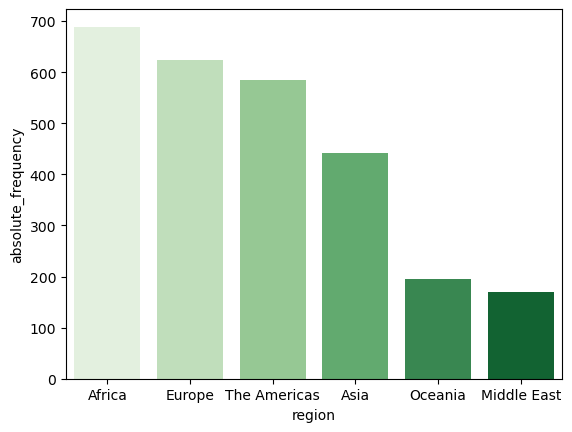

In [11]:
sns.barplot(x="region", y="absolute_frequency", data= region_table, palette= "Greens")
plt.show()

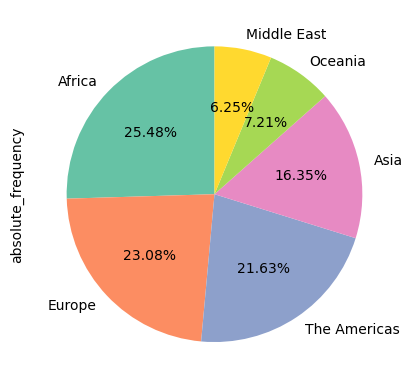

In [12]:
region_table["absolute_frequency"].plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

#### Numerical variables

In [13]:
numerical.describe()

,gdp,population_total,tourism_inbound,tourism_outbound,year
count,"2,704.00","2,704.00","2,704.00","2,704.00","2,704.00"
mean,"263,620,784,483.31","31,457,293.89","4,828,486,490.04","4,521,670,018.72","2,006.00"
std,"1,086,061,553,674.19","124,289,389.92","12,931,642,587.00","12,126,556,970.81",3.74
min,"63,101,272.00","18,876.00","700,000.00","200,000.00","2,000.00"
25%,"4,113,748,121.25","878,336.00","186,000,000.00","147,000,000.00","2,003.00"
50%,"19,722,668,276.50","5,800,324.50","803,000,000.00","551,500,000.00","2,006.00"
75%,"144,007,314,732.25","20,140,891.75","4,701,064,957.26","3,746,369,230.77","2,009.00"
max,"16,244,600,000,000.00","1,350,695,000.00","200,092,000,000.00","126,573,000,000.00","2,012.00"


- Insights I draw from describe():

The average value for GDP is 263,620,784,483.31, with a huge standard deviation, this means that some countries have very high GDP like 16,244,600,000,000.00 which is the max value, while some poor countries have really low values like 63,101,272.00 which is the minimum.

The average value for population_total is 31,457,293.89	with a big standard deviation this means that are bigger countries with high population like 1,350,695,000.00 and small countries with a population of 18,876.00 correspondent to maximum and minimum values respectively

Tourism inbound is based on the number of tourists that visit that specific country. The average amount of tourists visiting is 4,828,486,490.04 with a high standard deviation which means that there are countries that receive more tourists than others. The maximum value is 200,092,000,000.00 which corresponds to the most touristic country while the minimum value 700,000.00 corresponds to the least visited country.

Lastly, tourism outbound is based on the number of citizens from one country that visits foreign countries. The logic here is the same, the average amount of citizens flying out of the country is 4,521,670,018.72 with a standard deviation similar to inbound tourism, this means that some countries ahve a higher amount of citizens flying to other countries with a maximum value of 126,573,000,000.00 and countries with less tourists visiting other countries with a minimum value of 200,000.00.

Is the GDP related to more tourists visiting each country as well its citizens being able to visit foreign countries? That is what I will comclude in this analyzes.


#### Shape of distribution - Skewness

In [14]:
df_clean["gdp"].skew().round(2)

9.79

In [15]:
df_clean["tourism_inbound"].skew().round(2)

7.58

In [16]:
df_clean["population_total"].skew().round(2)

8.79

In [17]:
df_clean["tourism_outbound"].skew().round(2)

5.68

All variables are right skewed which means that there are higher values acting as outliers and increasing the mean. This goes along with the anlaysis above, specially gdp which is the highest value. There are countries that have an incredibly low gdp while some countries have really high values

#### Shape of distribution - Kurtosis

In [18]:
df_clean["gdp"].kurtosis().round(2)

114.26

In [19]:
df_clean["tourism_inbound"].kurtosis().round(2)

79.35

In [20]:
df_clean["population_total"].kurtosis().round(2)

82.38

In [21]:
df_clean["tourism_outbound"].kurtosis().round(2)

38.61

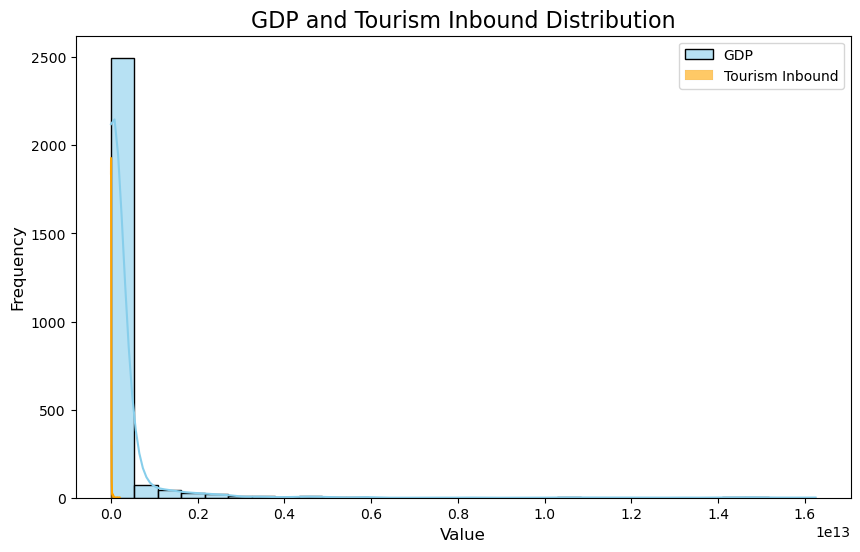

In [22]:
plt.figure(figsize=(10, 6))

sns.histplot(df_clean["gdp"], kde=True, color="skyblue", label="GDP", bins=30, alpha=0.6)
sns.histplot(df_clean["tourism_inbound"], kde=True, color="orange", label="Tourism Inbound", bins=30, alpha=0.6)

plt.title("GDP and Tourism Inbound Distribution", fontsize=16)

plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

All variables have a huge kurtosis making this distribution leptokurtic. I conclude that this distributions have heavier tails and a sharper peak compared to a normal distribution meaning that there are more extreme values (outliers) than expected in a normal distribution, specially in the gdp variable.

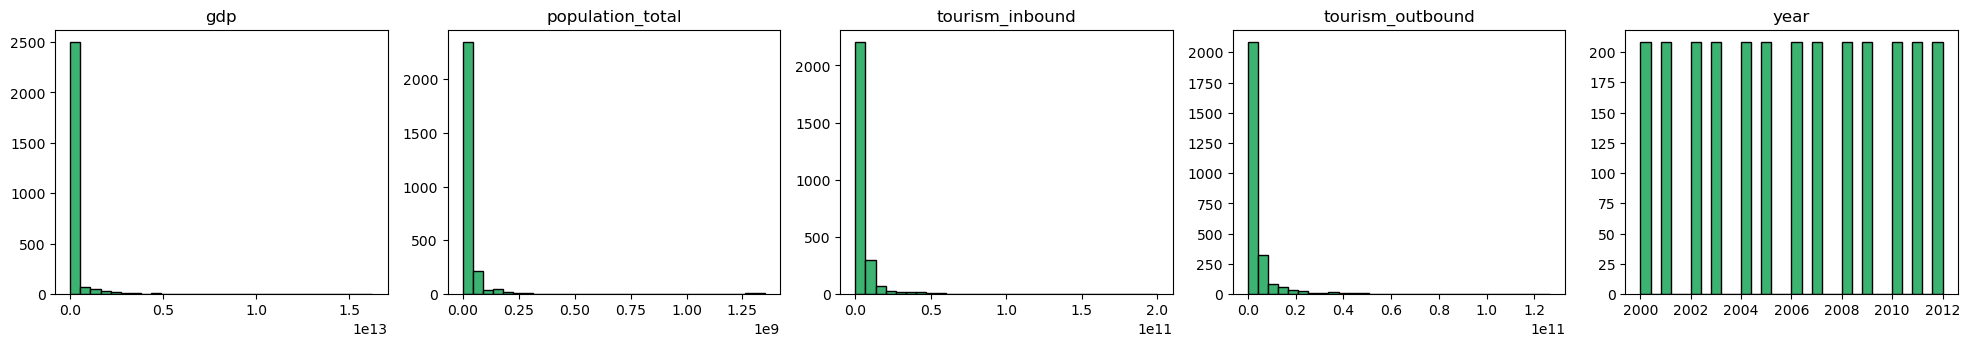

In [23]:
color = '#3CB371'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(numerical.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(numerical.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(numerical.columns[i])

plt.tight_layout()
plt.show()

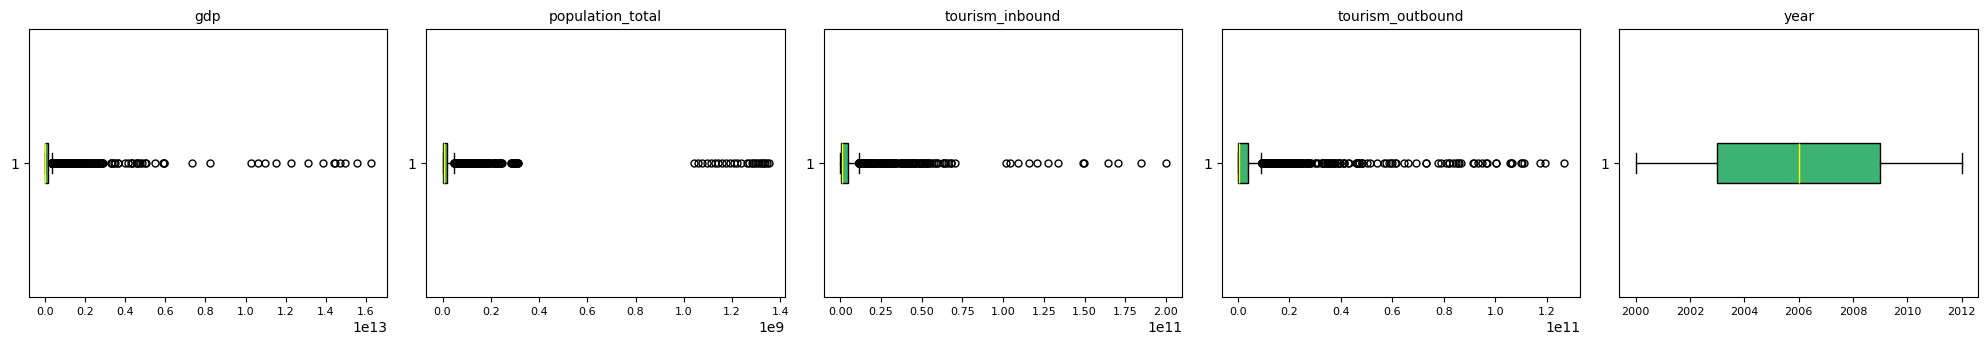

In [24]:
color = '#3CB371'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(numerical.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(numerical.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(numerical.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

- Insights I draw from histograms and boxplots:

As seen in the past analyses I can conclude once again that all variables are highly right skewed due to the big amount of outliers. The greatest part of the values are stored near 0 value which is a strong indicator of outliers or extreme values.

Also in the boxplots I can also clearly see the outliers within these variables, with gdp being the most affected.

<h3 style="color: #47FF64;"> Bivariate analysis </h3

<h4 style="color: #47FF64;"> Checking for correlations </h4

The main question of this analysis is if the tourism inbound and the national gdp have a strong correlation. The main question is , "the countries with an higher gdp has a biggest tourism inbound (when one grows the other as well = pearson) or if there is no relation between those two variables?"

In [25]:
df_clean["gdp"].corr(df_clean["tourism_inbound"], method="pearson")

0.8729786575872057

In [26]:
df_clean["gdp"].corr(df_clean["tourism_inbound"], method="spearman")

0.7003905632447935

- Insights I draw from the correlation analysis

The pearson correlation is higher than the spearman which concludes that there is a strong positive linear correlation between GDP and Tourism Inbound. It means that when toursim inbound increases the gdp increases as well.

Regarding the spearman correlation, it is also a strong monotonic correlation which indicates us that indeed when tourism inbound increases the gdp increases as well. However the difference is that it can grow at a different rate not in a straight line.

In [27]:
numerical.head(5)

,gdp,population_total,tourism_inbound,tourism_outbound,year
0,"54,790,058,957.00",31719449,"102,000,000.00","193,000,000.00",2000
1,"9,129,594,819.00",13924930,"34,000,000.00","146,000,000.00",2000
2,"2,359,122,303.00",6949366,"77,000,000.00","50,000,000.00",2000
3,"5,788,311,645.00",1755375,"227,000,000.00","209,000,000.00",2000
4,"2,610,959,139.00",11607944,"23,000,000.00","30,000,000.00",2000


In [28]:
numerical.corrwith(df_clean["gdp"], method="pearson").sort_values(ascending=False)

gdp                1.00
tourism_inbound    0.87
tourism_outbound   0.85
population_total   0.38
year               0.06
dtype: float64

In [29]:
correlation_matrix= numerical.corr()
correlation_matrix

,gdp,population_total,tourism_inbound,tourism_outbound,year
gdp,1.00,0.38,0.87,0.85,0.06
population_total,0.38,1.00,0.30,0.32,0.01
tourism_inbound,0.87,0.30,1.00,0.86,0.09
tourism_outbound,0.85,0.32,0.86,1.00,0.08
year,0.06,0.01,0.09,0.08,1.00


I can conclude that tourism_inbound has the strongest correlation with gdp followed by tourism_outbound indicating that when these variables increase the GDP increases as well.
Population_total have a moderate positive correlation and year has a weak correlation. There are no negative correlations within these variables therefore there are no variables that will decrease when gdp increases and vice-versa.


<h4 style="color: #47FF64;"> Representation with an heatmap </h4

In this heatmap I will be representing the correlations analysed above, as well the multicollinearity between tourism_inbound and tourism_outbound

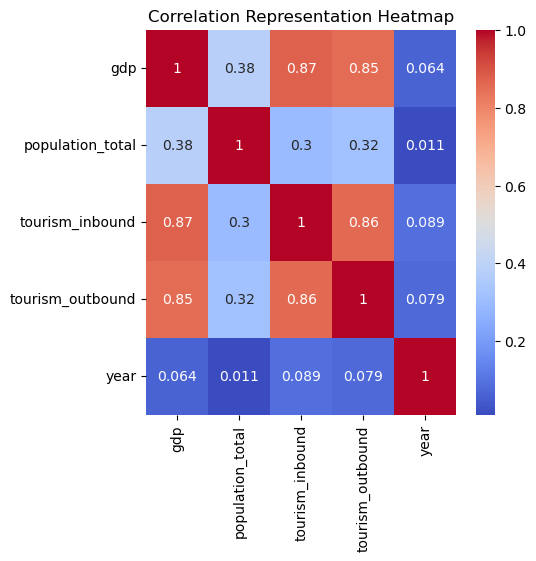

In [30]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Representation Heatmap")
plt.show()

<h4 style="color: #47FF64;"> Representation with an heatmap- Spearman </h4

In [31]:
numerical.corrwith(df_clean["gdp"], method="spearman").sort_values(ascending=False)

gdp                1.00
tourism_outbound   0.74
tourism_inbound    0.70
population_total   0.55
year               0.18
dtype: float64

In [32]:
correlation_matrix_s= numerical.corr(method="spearman")
correlation_matrix_s

,gdp,population_total,tourism_inbound,tourism_outbound,year
gdp,1.00,0.55,0.70,0.74,0.18
population_total,0.55,1.00,0.27,0.35,0.03
tourism_inbound,0.70,0.27,1.00,0.87,0.16
tourism_outbound,0.74,0.35,0.87,1.00,0.11
year,0.18,0.03,0.16,0.11,1.00


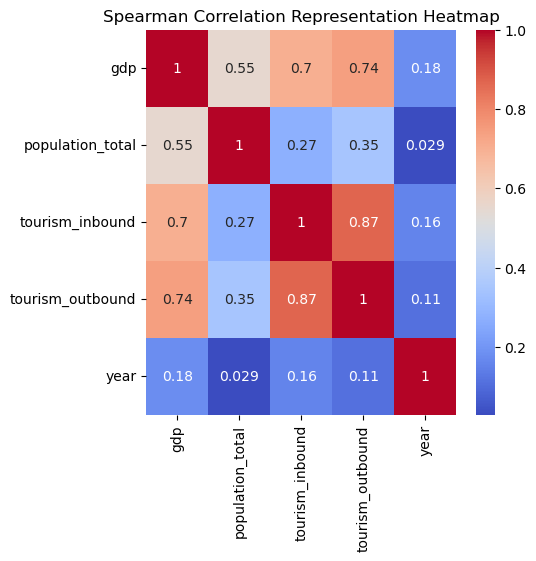

In [33]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_s, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Representation Heatmap")
plt.show()

<h4 style="color: #47FF64;"> Scatterplots visualizations </h4

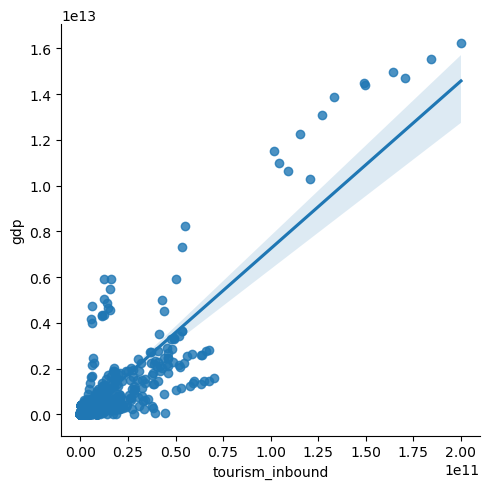

In [34]:
sns.lmplot(data=df_clean,
            x='tourism_inbound',
            y='gdp')
plt.show()

This visualization shows clearly the extreme outliers in this data set, as explained before in this analysis

<h4 style="color: #47FF64;"> Pairplot Visualization between Tourism_inbound VS GDP </h4

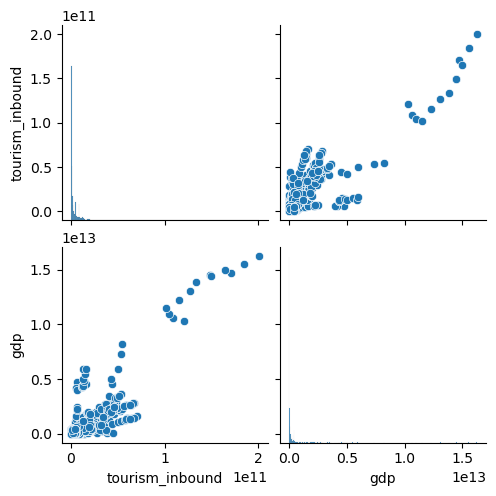

In [35]:
sns.pairplot(df_clean[["tourism_inbound", "gdp"]])
plt.show()

<h4 style="color: #47FF64;"> Evolution over the years </h4

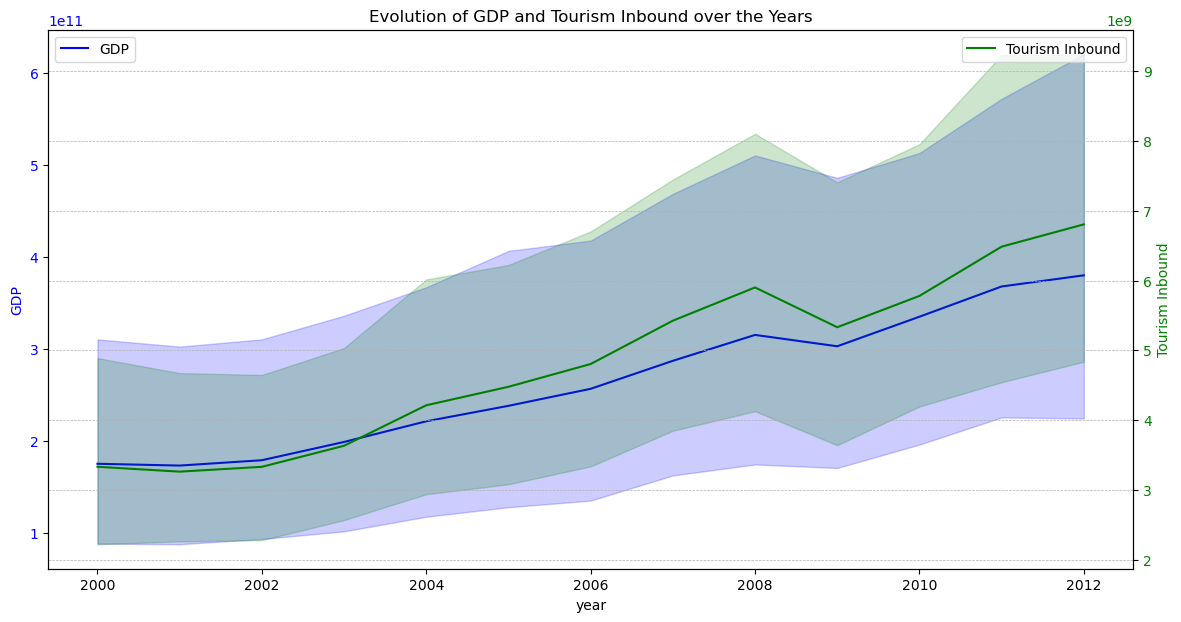

In [36]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP on the first y-axis
sns.lineplot(data=df_clean, x='year', y='gdp', ax=ax1, color='b', label='GDP')
ax1.set_ylabel('GDP', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(data=df_clean, x='year', y='tourism_inbound', ax=ax2, color='g', label='Tourism Inbound')
ax2.set_ylabel('Tourism Inbound', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Evolution of GDP and Tourism Inbound over the Years')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

- Insights I draw from the line plot

The plot shows a clear positive correlation between GDP and tourism inbound over the years. As tourism grows, so does GDP, indicating that the tourism sector is likely driving economic growth. The relationship appears to be largely linear, with both variables increasing steadily.

This trend suggests that tourism plays a significant role in boosting the economy, with its growth directly contributing to higher GDP. The consistent upward movement in both indicators highlights the interdependence between tourism and economic performance.

<h4 style="color: #47FF64;"> Hypothesis Testing </h4

- This is the hypothesis I am testing:

Null Hypothesis (H₀): "The mean GDP of the high inbound tourism group is equal to or less than that of the low inbound tourism group"

Alternative Hypothesis (H₁): "The mean GDP of the high inbound tourism group is greater than that of the low inbound tourism group"

In [37]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
#two tail t-test
alpha= 0.05

In order to proceed with the two sample t-test i will start by splitting the data in two groups. One group with "high" inbound tourism revenue and another with "low" inbound tourism revenue.

In [39]:
median_value = df_clean['tourism_inbound'].median()
countries_high = df_clean[df_clean['tourism_inbound'] > median_value]['gdp']
countries_low = df_clean[df_clean['tourism_inbound'] <= median_value]['gdp']

In [40]:
t_stat, p_value = st.ttest_ind(countries_high, countries_low, equal_var=False, alternative= "greater")
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.34f}")
print()
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Not enough evidence to support that the mean GDP is greater in countries with high inbound tourism.")
else:
    print("Reject the Null Hypothesis: There is evidence to support that the mean GDP is greater in countries with high inbound tourism.")

Test Statistic (t): 11.44
P-Value: 0.0000000000000000000000000000267645

Reject the Null Hypothesis: There is evidence to support that the mean GDP is greater in countries with high inbound tourism.


----------------------------------------------------------------------------------

Upon checking the results I can conclude that since the p-value is extremely close to zero, it indicates strong evidence against the null hypothesis.

This means that I reject the null hypothesis.

There is significant evidence suggesting that the mean GDP is indeed greater in countries with high inbound tourism revenue.

This result suggests a positive impact of high inbound tourism revenue on GDP, implying that initiatives to boost tourism could be beneficial for economic growth.

<h1 style="color: #47FF64;">04 | Machine Learning</h1>

In [41]:
df_ml= df_clean.copy()

In [42]:
df_ml.drop(columns=["year","country"],inplace=True) #dropping unecessary columns

In [43]:
import pandas as pd
import numpy as np

df_encoded = pd.get_dummies(df_ml, columns=['region'], drop_first=True) #to drop the region column after

In [44]:
categories=[]
median_gdp= df_encoded["gdp"].mean()

for col in df_encoded["gdp"]:
    if col <= median_gdp:
        categories.append("high")
    else:
        categories.append("low")
categories

['high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 '

In [45]:
df_encoded["category"]= categories
df_encoded= df_encoded*1

In [46]:
df_encoded

,gdp,population_total,tourism_inbound,tourism_outbound,region_Asia,region_Europe,region_Middle East,region_Oceania,region_The Americas,category
0,"54,790,058,957.00",31719449,"102,000,000.00","193,000,000.00",0,0,0,0,0,high
1,"9,129,594,819.00",13924930,"34,000,000.00","146,000,000.00",0,0,0,0,0,high
2,"2,359,122,303.00",6949366,"77,000,000.00","50,000,000.00",0,0,0,0,0,high
3,"5,788,311,645.00",1755375,"227,000,000.00","209,000,000.00",0,0,0,0,0,high
4,"2,610,959,139.00",11607944,"23,000,000.00","30,000,000.00",0,0,0,0,0,high
...,...,...,...,...,...,...,...,...,...,...
2699,"403,828,124,350.17",32427,"4,701,064,957.26","3,746,369,230.77",0,0,0,0,1,low
2700,"16,244,600,000,000.00",313873685,"200,092,000,000.00","126,573,000,000.00",0,0,0,0,1,low
2701,"50,004,354,667.00",3395253,"2,222,000,000.00","1,028,000,000.00",0,0,0,0,1,high
2702,"381,286,223,859.00",29954782,"904,000,000.00","3,202,000,000.00",0,0,0,0,1,low


In [47]:
df_encoded["num_category"] = df_encoded["category"].map({"high": 1, "low": 0})

In [48]:
df_ml= df_encoded.drop(columns="category", axis=1)
df_ml.head(2)

,gdp,population_total,tourism_inbound,tourism_outbound,region_Asia,region_Europe,region_Middle East,region_Oceania,region_The Americas,num_category
0,"54,790,058,957.00",31719449,"102,000,000.00","193,000,000.00",0,0,0,0,0,1
1,"9,129,594,819.00",13924930,"34,000,000.00","146,000,000.00",0,0,0,0,0,1


In [49]:
X = df_ml.drop('num_category', axis=1)
y = df_ml['num_category']

In [50]:
X.head(2)

,gdp,population_total,tourism_inbound,tourism_outbound,region_Asia,region_Europe,region_Middle East,region_Oceania,region_The Americas
0,"54,790,058,957.00",31719449,"102,000,000.00","193,000,000.00",0,0,0,0,0
1,"9,129,594,819.00",13924930,"34,000,000.00","146,000,000.00",0,0,0,0,0


In [51]:
y.head(2)

0    1
1    1
Name: num_category, dtype: int64

Text(0.5, 1.0, 'Low vs High Category')

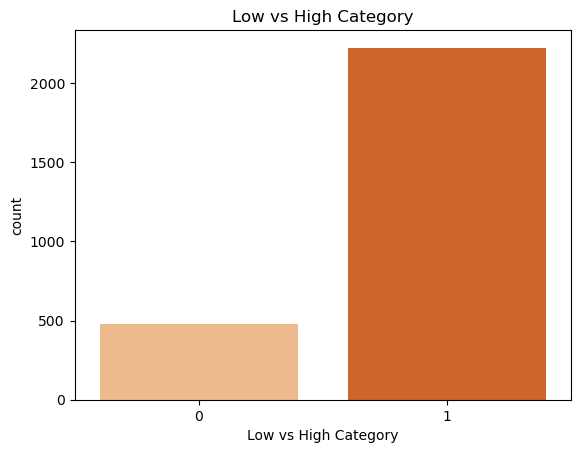

In [52]:
sns.countplot(data=df_ml, x="num_category", palette="Oranges")
plt.xlabel("Low vs High Category")
plt.title("Low vs High Category")

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
print(f'100% of our data: {len(df_ml)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 2704.
70% for training data: 1892.
30% for test data: 812.


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
#model validation

predictions = model.predict(X_test)

In [58]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 812.


In [59]:
#metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.45      0.90      0.60       134
           1       0.98      0.78      0.87       678

    accuracy                           0.80       812
   macro avg       0.71      0.84      0.73       812
weighted avg       0.89      0.80      0.82       812



In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

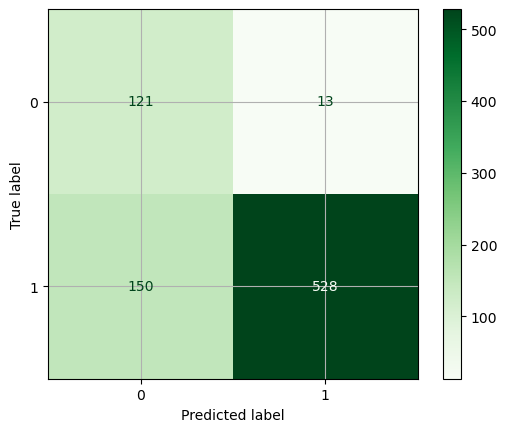

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Greens')  
plt.grid(True)
plt.show()

<h3 style="color: #47FF64;">Imbalanced Data</h3>
#model does not perform well due to imbalance data

In [62]:
from sklearn.utils import resample
train = pd.concat([X_train, y_train], axis=1)

In [63]:
high = train[train['num_category']==1]
low = train[train['num_category']==0]

In [64]:
undersampled_high = resample(high,
                             replace=False,  # Sample without replacement
                             n_samples=len(low),  # Match number in minority class
                             random_state=42)  # Reproducible results

In [65]:
display(high.shape)
display(low.shape)
display(undersampled_high.shape)

(1546, 10)

(346, 10)

(346, 10)

In [66]:
train_undersampled = pd.concat([low,undersampled_high])
train_undersampled.sample(10)

,gdp,population_total,tourism_inbound,tourism_outbound,region_Asia,region_Europe,region_Middle East,region_Oceania,region_The Americas,num_category
1588,"647,155,131,952.00",69496513,"21,662,000,000.00","4,254,000,000.00",0,1,0,0,0,0
348,"34,890,773,740.00",1980604,"286,000,000.00","3,207,000,000.00",0,0,1,0,0,1
2348,"7,321,891,954,613.00",1344130000,"53,313,000,000.00","79,010,000,000.00",1,0,0,0,0,0
1349,"2,255,706,212,516.00",63617975,"54,450,000,000.00","39,331,000,000.00",0,1,0,0,0,0
706,"142,640,079,033.00",64488338,"10,456,000,000.00","3,538,000,000.00",1,0,0,0,0,1
747,"59,466,017,706.00",21574326,"523,000,000.00","572,000,000.00",0,1,0,0,0,1
2593,"315,164,386,682.00",5591572,"6,135,000,000.00","9,600,000,000.00",0,1,0,0,0,0
1262,"107,484,034,648.00",72990754,"8,133,000,000.00","2,156,000,000.00",0,0,0,0,0,1
615,"403,828,124,350.17",27450,"4,701,064,957.26","3,746,369,230.77",0,0,0,0,1,0
2260,"50,980,167,048.00",10016797,"4,209,000,000.00","554,000,000.00",0,0,0,0,1,1


In [67]:
print(train_undersampled['num_category'].value_counts())


num_category
0    346
1    346
Name: count, dtype: int64


Text(0.5, 1.0, 'Low vs High Category')

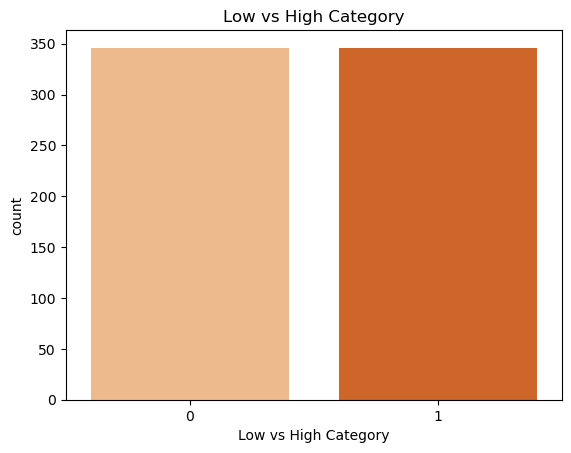

In [68]:
sns.countplot(data=train_undersampled, x="num_category", palette="Oranges")
plt.xlabel("Low vs High Category")
plt.title("Low vs High Category")

In [69]:
X_train = train_undersampled.drop('num_category',axis = 1).copy()
y_train = train_undersampled['num_category'].copy()

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
predictions = model.predict(X_test)

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       134
           1       1.00      1.00      1.00       678

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



Conclusion: I managed to downsample the high category and improve the model however it shows almost perfect values which can be a proof of overfitting.